In [1]:
import os
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
import sys
sys.path.append(os.path.abspath("../../"))

In [2]:
from core.median_filter import *
from core.median_filter import apply_median_filter_cpu
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
import h5py
img_dict = {}
with h5py.File("../../data/test_Samsung_SNU_patches_SET050607080910_divided_by_fnum_setnum.hdf5") as f:
    for key in f.keys():
        #print(key)
        img_dict[key] = {} # f[key]
        for subkey in f[key].keys():
            img_dict[key][subkey] = np.array(f[key][subkey])

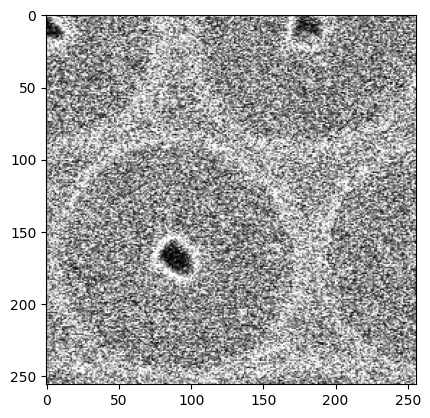

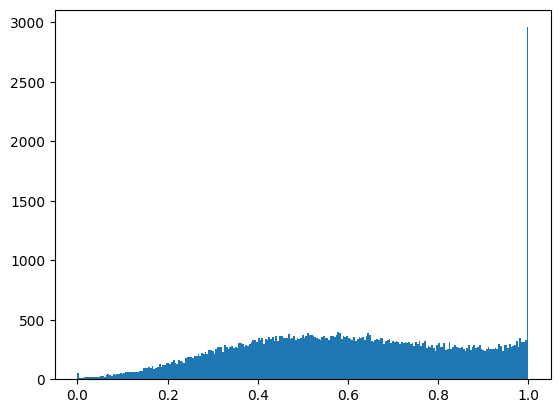

In [74]:
img = img_dict['SET07']['F01'][0]
plt.imshow(img, cmap='gray')
plt.pause(0.01)
plt.hist(img.flatten(), bins=255)
print("")
plt.pause(0.01)



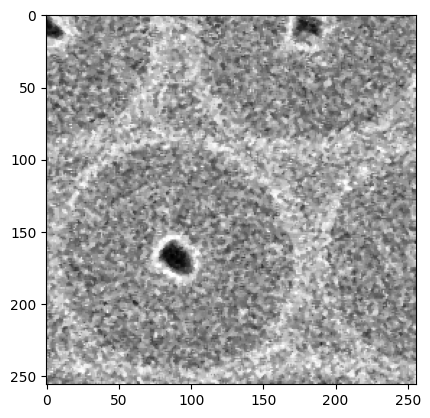

In [78]:
median_img = apply_median_filter_cpu(img, kernel_size=3,repeat=1)
plt.imshow(median_img, cmap='gray')

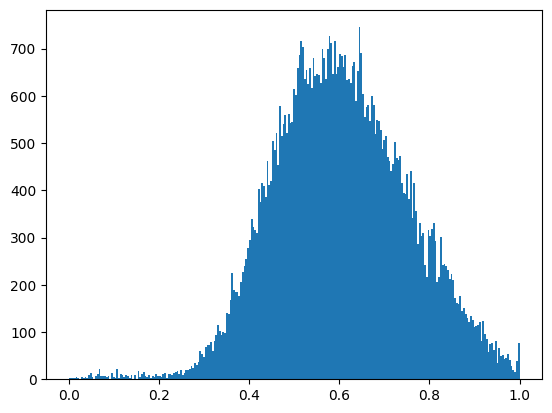

In [79]:
plt.hist(median_img.flatten(), bins=255,range=(0,1))
print("")

In [83]:
def common2nd_filter(img):
    from collections import Counter
    cnt = Counter(img.flatten())
    print(cnt.most_common(10))
    common2nd = None
    for key, value in cnt.most_common(10):
        if abs(key - 1) < 0.2 :
            continue
        else :
            common2nd = key
            break
    print("2nd common number : ",common2nd)
    return common2nd
def show_edge_result(img):
    
    img_edge = img.copy()
    common2nd = common2nd_filter(img_edge)
    ratio = 0.2
    min_val = common2nd*(1-ratio)
    max_val = common2nd*(1+ratio)
    print("set value 0 which range out of ",min_val," ~ ",max_val)
    img_edge[img_edge<min_val] = 0 
    img_edge[img_edge>max_val] = 0 
    plt.subplot(121)
    plt.title('')
    plt.imshow(img_edge, cmap='gray')
    plt.subplot(122)
    plt.title("inverse")
    plt.imshow(img - img_edge, cmap='gray')
    plt.pause(0.01)
    out= img - img_edge
    out = (out - out.min()) / np.ptp(out)
    plt.imshow(out)
    plt.pause(0.01)
    plt.hist(img_edge.flatten(), bins=255,range=(0.000001,1))
    print("")
    plt.pause(0.01)
    img_edge = img.copy()
    img_edge[img_edge <0.9] = 0
    plt.title("leave only 1 value")
    plt.imshow(img_edge, cmap='gray')
    plt.pause(0.01)

[(1.0, 2479), (0.99607843, 479), (0.5764706, 396), (0.5803922, 392), (0.6431373, 389), (0.50980395, 389), (0.46666667, 381), (0.57254905, 376), (0.49803922, 375), (0.5176471, 373)]
2nd common number :  0.5764706
set value 0 which range out of  0.46117649078369144  ~  0.6917647361755371


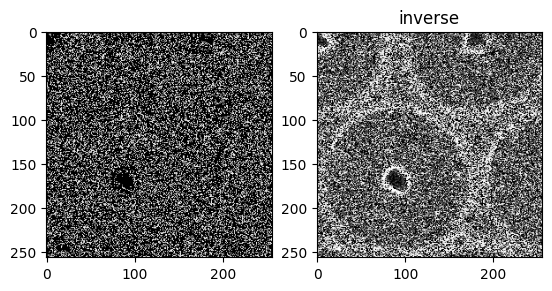

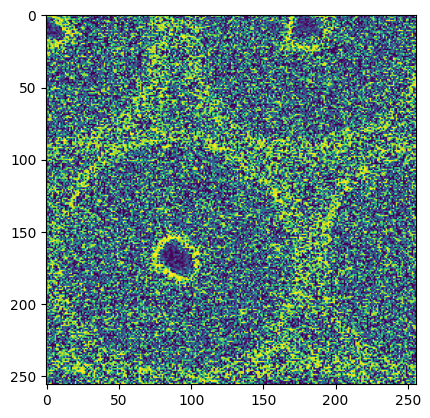

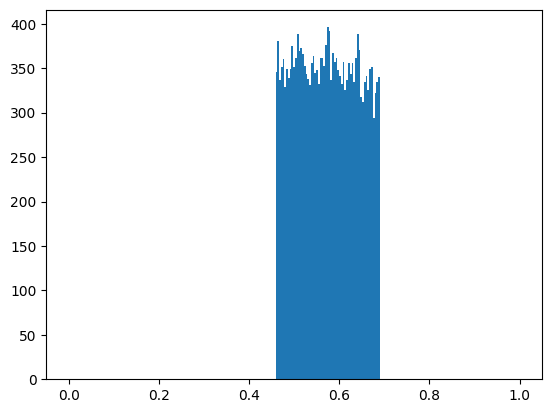

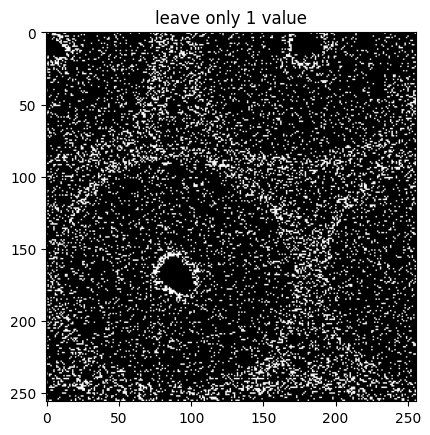

In [84]:
show_edge_result(img)

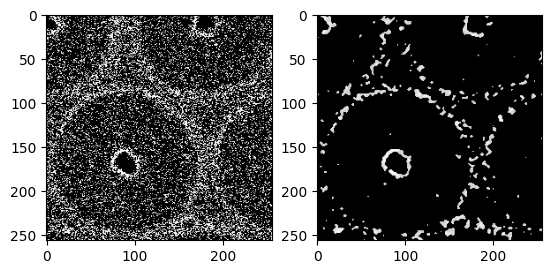

In [69]:
img_edge = img.copy()
img_edge[img_edge <0.8] = 0
plt.subplot(121)
plt.imshow(img_edge, cmap='gray')
plt.subplot(122)
median_img_edge = apply_median_filter_cpu(img_edge, 3,repeat=3)
plt.imshow(median_img_edge, cmap='gray')

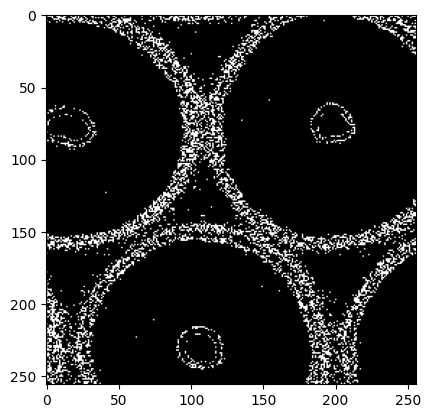

In [27]:

img_edge = img.copy()
min_val = 0.77
max_val = 0.83
img_edge[img_edge<min_val] = 0 
img_edge[img_edge>max_val] = 0 
img_edge[img_edge !=0] = 1
plt.imshow(img_edge, cmap='gray')

In [4]:
img_dict['SET06'].keys()

dict_keys(['F01', 'F02', 'F04', 'F08', 'F16', 'F32', 'F64'])

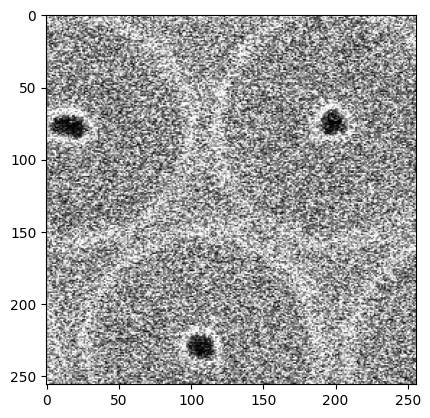

In [5]:
plt.imshow(img_dict['SET06']['F01'][0],cmap='gray')

## Sobel filter

In [6]:
img_dict['SET06']['F01'][0].shape

(256, 256)

In [7]:
dx = cv2.Sobel(img_dict['SET06']['F01'][0], -1, 1, 0, delta=128) # delta 값을 지정해주지 않으면 미분이 - 부분은 0
dy = cv2.Sobel(img_dict['SET06']['F01'][0], -1, 0, 1, delta=128)

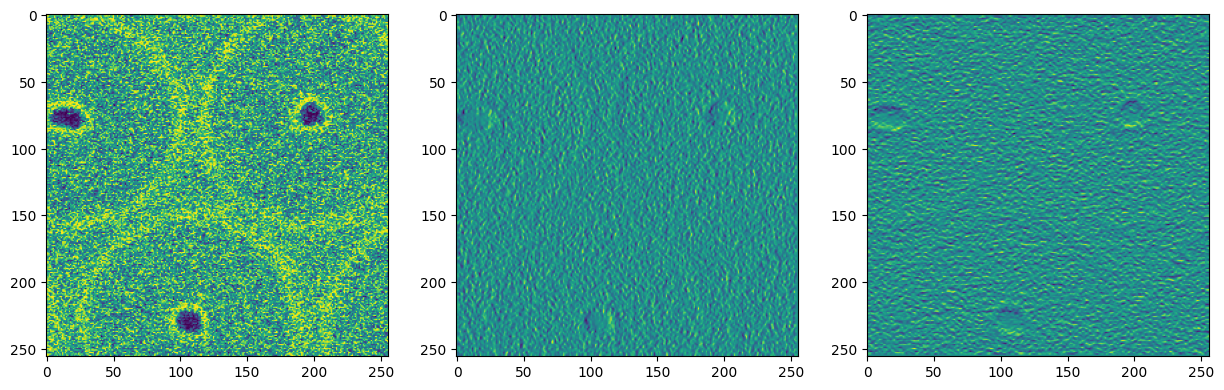

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(img_dict['SET06']['F01'][0])
plt.subplot(132)
plt.imshow( dx)
plt.subplot(133)
plt.imshow( dy)

In [9]:
img = 255*(img_dict['SET06']['F01'][0] - np.min(img_dict['SET06']['F01'][0])) / np.ptp(img_dict['SET06']['F01'][0])
img = np.uint8(img)


In [15]:
cv2.GaussianBlur?

Docstring:
GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
.   @brief Blurs an image using a Gaussian filter.
.   
.   The function convolves the source image with the specified Gaussian kernel. In-place filtering is
.   supported.
.   
.   @param src input image; the image can have any number of channels, which are processed
.   independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
.   @param dst output image of the same size and type as src.
.   @param ksize Gaussian kernel size. ksize.width and ksize.height can differ but they both must be
.   positive and odd. Or, they can be zero's and then they are computed from sigma.
.   @param sigmaX Gaussian kernel standard deviation in X direction.
.   @param sigmaY Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be
.   equal to sigmaX, if both sigmas are zeros, they are computed from ksize.width and ksize.height,
.   respectively (see #getGaussianKernel for 

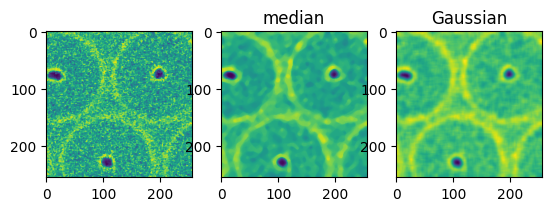

In [18]:
out_abf = cv2.bilateralFilter(img, 5, 75, 75)
out_median = apply_median_filter_cpu(img,kernel_size=7,repeat=3)#cv2.medianBlur(img, 5)
out_gaussian = cv2.GaussianBlur(img,(11,11), 5.0)
plt.subplot(131)
plt.imshow(out_abf)
plt.subplot(132)
plt.title("median")
plt.imshow(out_median)
plt.subplot(133)
plt.title("Gaussian")
plt.imshow(out_gaussian)

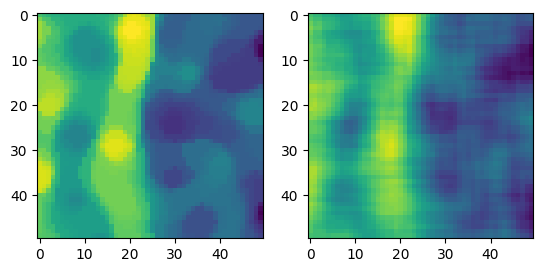

In [19]:
plt.subplot(121)
plt.imshow(out_median[50:100,100:150])
plt.subplot(122)
plt.imshow(out_gaussian[50:100,100:150])

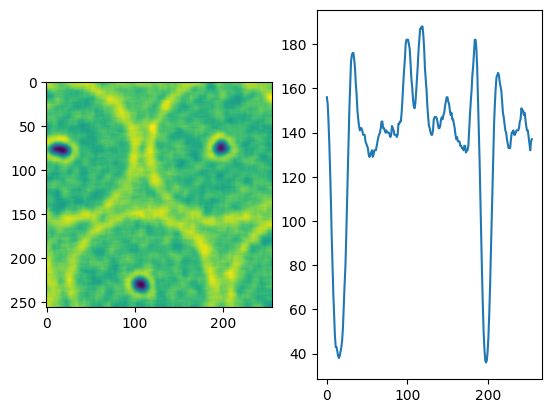

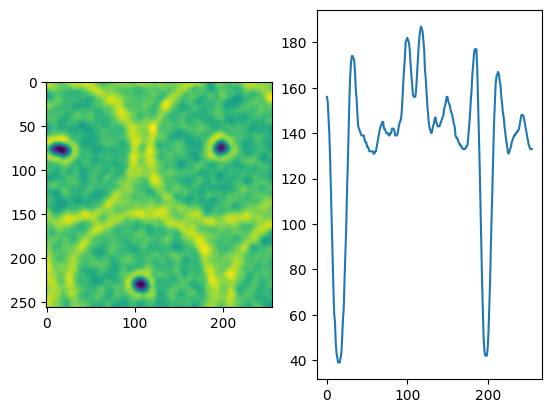

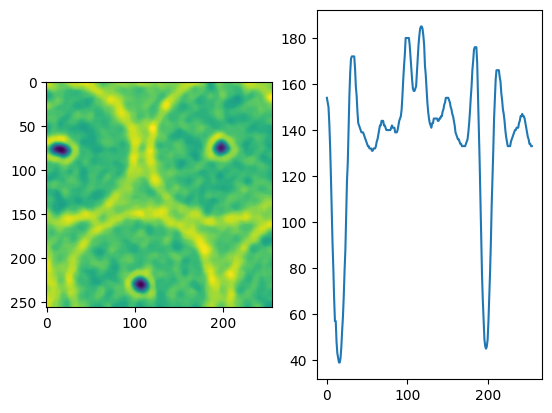

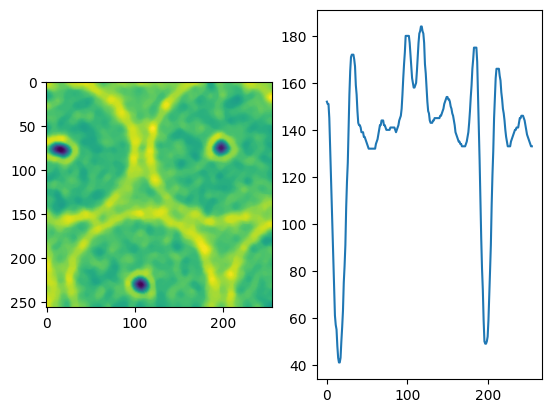

In [25]:
for repeat in range(4):
    out_gaussian_median = apply_median_filter_cpu(out_gaussian,kernel_size=5,repeat=repeat)
    plt.subplot(121)
    plt.imshow(out_gaussian_median)#[50:100,100:150])
    plt.subplot(122)
    plt.plot(out_gaussian_median[75])
    plt.pause(0.01)

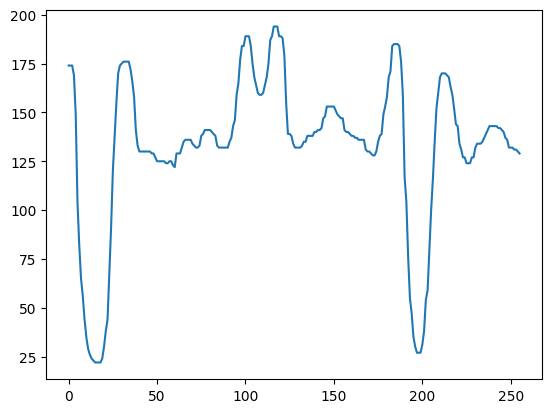

In [24]:
plt.plot(out_median[75])

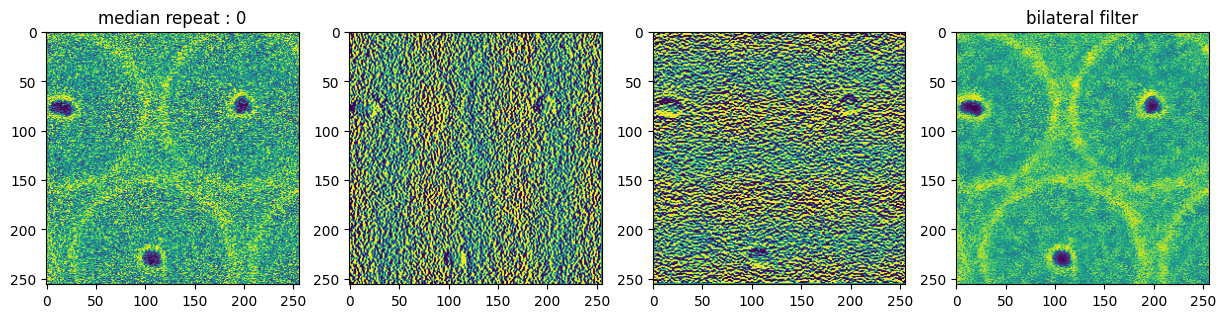

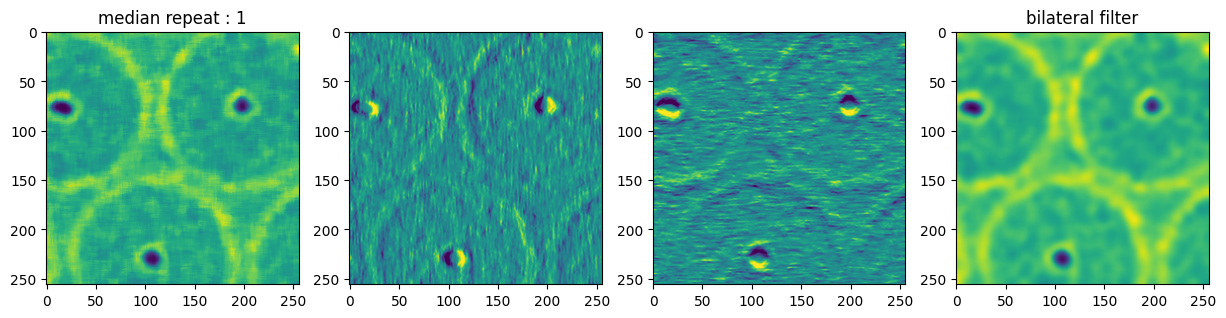

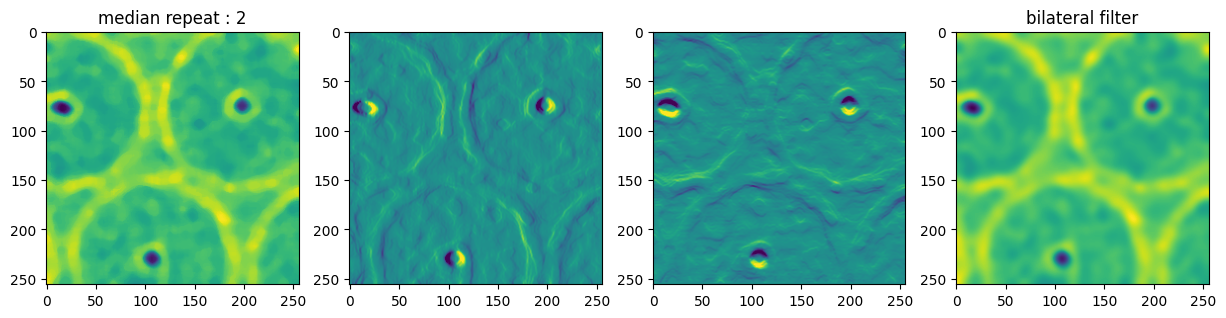

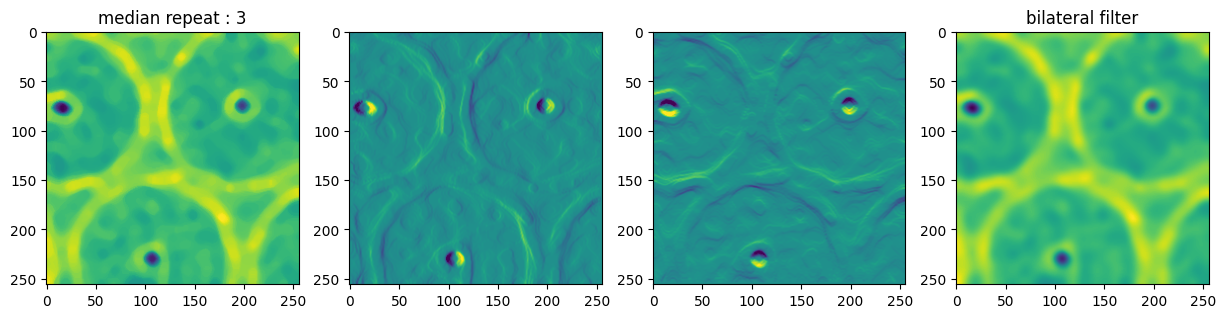

In [84]:
for repeat in range(4):
    out_median = apply_median_filter_cpu(img,repeat=repeat)#cv2.medianBlur(img, 5)
    median_dx = cv2.Sobel(out_median, -1, 1, 0, delta=128) # delta 값을 지정해주지 않으면 미분이 - 부분은 0
    median_dy = cv2.Sobel(out_median, -1, 0, 1, delta=128)
    out_abf = cv2.bilateralFilter(out_median, 11, 75, 75)
    
    plt.figure(figsize=(15,5))
    plt.subplot(141)
    plt.title(f"median repeat : {repeat}")
    plt.imshow(out_median)
    plt.subplot(142)
    plt.imshow( median_dx)
    plt.subplot(143)
    plt.imshow( median_dy)
    plt.subplot(144)
    plt.title("bilateral filter")
    plt.imshow(out_abf)
    plt.pause(0.01)


In [28]:
out = cv2.Canny(img,50,220)

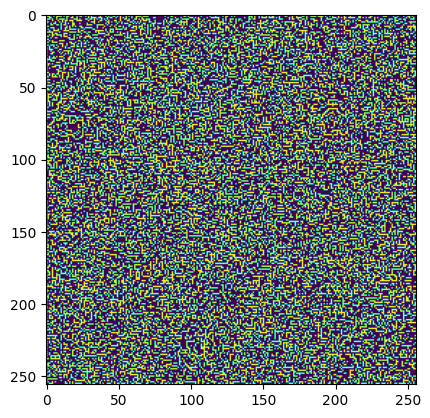

In [29]:
plt.imshow(out)

## Network case

In [12]:
import torch
import torch.nn as nn

In [18]:

net = nn.Sequential(
    nn.Conv2d(1, 64, 3, padding=1),
    nn.ReLU(),
    nn.Conv2d(64, 1, 3, padding=1),
    nn.Sigmoid()
)

In [19]:
img_dict['SET06']['F01'].shape

(480, 256, 256)

In [31]:

input_image = torch.from_numpy(img_dict['SET06']['F01'][0:2]).float()
input_image = input_image.unsqueeze(1)
print(input_image.shape)
out = net(input_image.float())

torch.Size([2, 1, 256, 256])


In [32]:
out.shape

torch.Size([2, 1, 256, 256])

length :  2


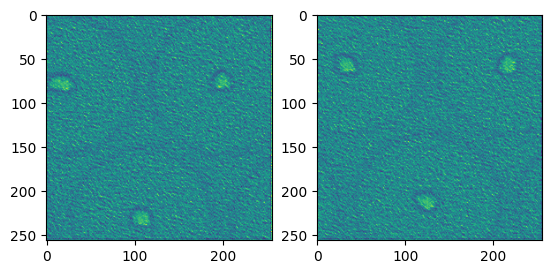

In [41]:
try:
    out = out.detach().numpy()
except:
    pass
print("length : ",len(out))
for i in range(len(out)):
    plt.subplot(1,len(out),i+1)
    plt.imshow(out[i][0])

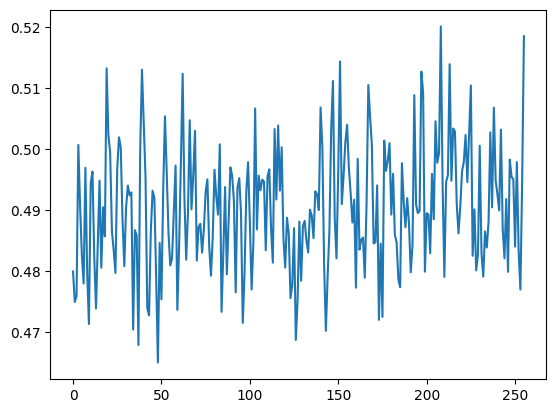

In [42]:
plt.plot(out[0][0][50])